#### **DCGAN - GANs with deep CNN**

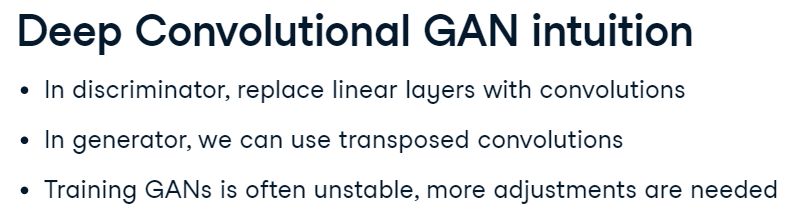

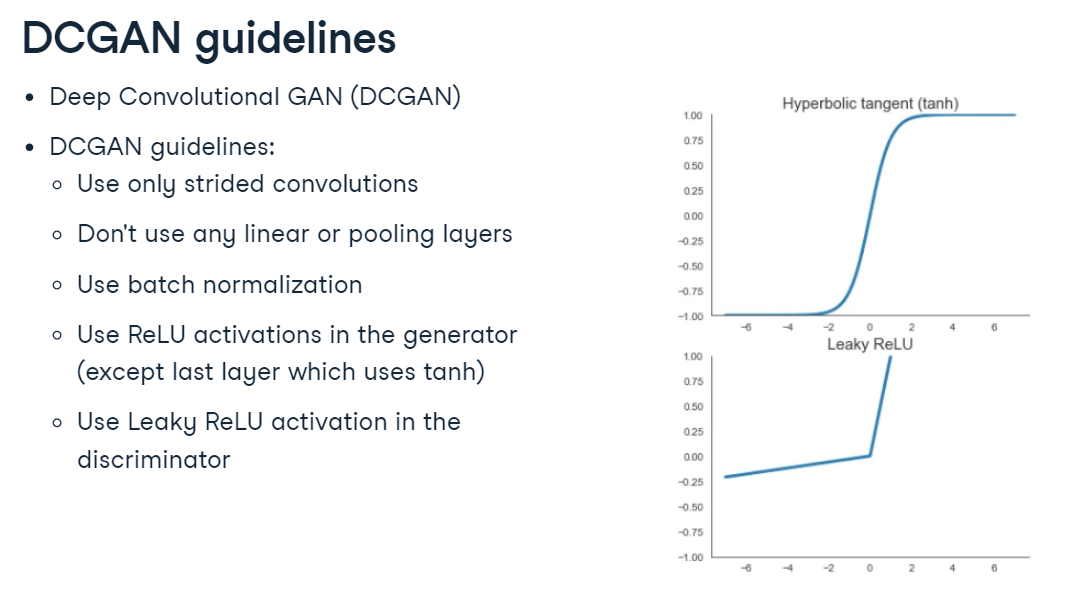

#### Then, what is a Strided Convolution?

Convolutions with any stride above 1 are referred to as strided.

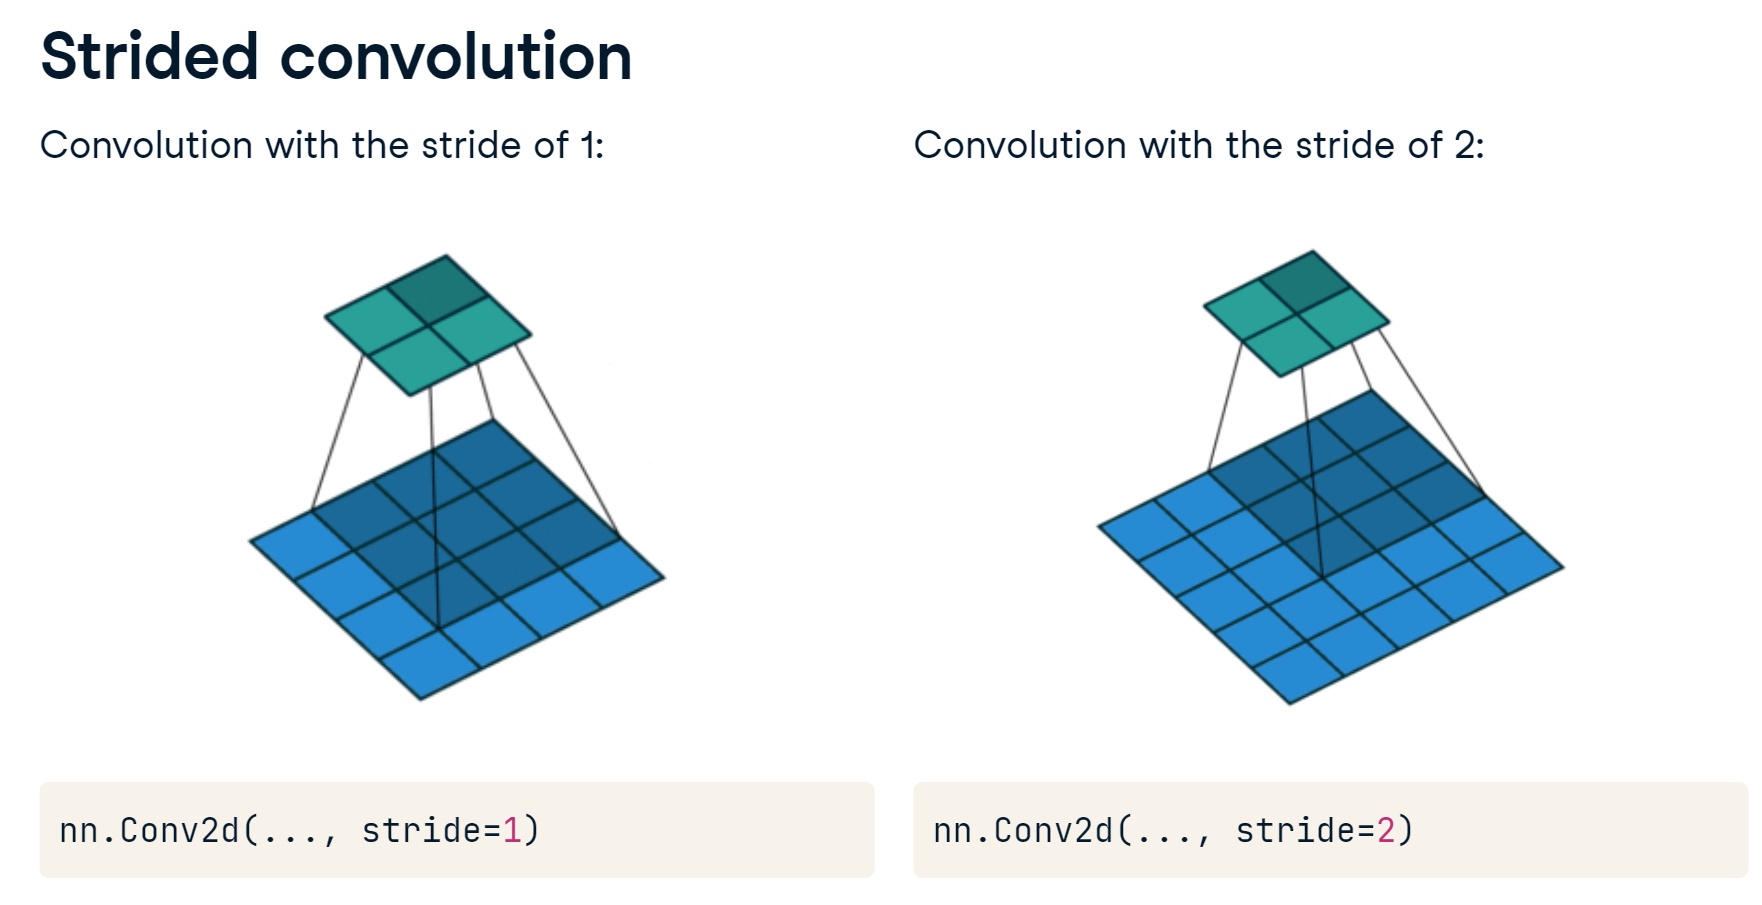

#### **DCGAN**

In [ ]:
# DC Generator

class DCGenerator(nn.Module):
    def __init__(self, in_dim, out_dim, kernel_size=4, stride=2):
        super(DCGenerator, self).__init__()
        self.in_dim = in_dim
        self.gen = nn.Sequential(
            dc_gen_block(in_dim, 1024, kernel_size, stride),
            dc_gen_block(1024, 512, kernel_size, stride),
            dc_gen_block(512, 256, kernel_size, stride),
            nn.ConvTranspose2d(256, 3, kernel_size, stride),
            nn.Tanh(),
        )

    def dc_gen_block(in_dim, out_dim, kernel_size, stride):
        return nn.sequential(
            nn.ConvTranspose2d(in_dim, out_dim, kernel_size=kernel_size, stride=stride),
            nn.BatchNorm2d(out_dim),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = x.view(len(x), self.in_dim, 1, 1)
        return self.gen(x)

In [ ]:
# Discriminator Block

class DCDiscriminator(nn.Module):
    def __init__(self, kernel_size=4, stride=2):
        super(DCDiscriminator, self).__init__()
        self.disc = nn.Sequential(
            dc_disc_block(3, 512, kernel_size, stride),
            dc_disc_block(512, 1024, kernel_size, stride),
            nn.Conv2d(1024, 1, kernel_size, stride=stride),
        )
    
    def forward(self, x):
        x = self.disc(x)
        return x.view(len(x), -1)
    
    def dc_disc_block(in_dim, out_dim, kernel_size, stride):
        return nn.Sequential(
            nn.Conv2d(in_dim, out_dim, kernel_size, stride=stride),
            nn.BatchNorm2d(out_dim),
            nn.LeakyReLU(0.2),
        )